# 시계열 데이터 분석 (Auto ARIMA)


## #01. 작업준비

### 패키지 참조

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys

### 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 가져오기



In [3]:
df = pd.read_excel("https://data.hossam.kr/E06/air_passengers.xlsx",index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## #02. 데이터 분석 
###  데이터 분할
#### 시계열데이터기 때문에 첨부터 70%까지 분할

학습용 데이터 

In [5]:
## 처음부터 70%위치 전까지 분할

train = df[:int(len(df)*0.7)]
len(train)

100

검증용 데이터 (나머지 30)

In [7]:
test = df[int(len(df)*0.7):]
len(test)

44

### 모델 구축

시계열 데이터를 계절 ARIMA 모델에 맞추려고 할 때 첫번째 목표는 측정항목을 최적화 하는 ARIMA(p,d,q)(P,D,Q)M 값을 찾는것

m값을 고정한 상태에서 0부터 (p,d,q)(P,D,Q,m)로 주어진 값의 범위 안에서 최적의 값을 검색한다.


In [8]:
my_p = 5    # 적절히 넉넉히
my_d = 2    # 차분 횟수 (검증한 결과를 활용)
my_q= 5     # 적절히 넉넉히
my_s = 12   # 계절성 주기 (12개월)

model = auto_arima(
    y=train,        ## 모델링 하려고 하는 시계열 데이터
    start_p=0,      ## p의 시작점
    max_p=my_p,     ## p의 최대값
    d=my_d,         ## 차분횟수
    start_q=0,      ## q의 시작점
    max_q=my_q,     ## q의 최대값
    seasonal=True,  ## 계절성 사용 여부
    m=my_s,         ## 계절성 주기
    start_P=0,      ## P의 시작점
    max_P = my_p,   ## P의 최대값
    D=my_d,         ## 계절성 차분 횟수
    start_Q=0,      ## Q의 시작점
    max_Q=my_q,     ## Q의 최대값
    trace = True    ## 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=700.560, Time=0.20 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=628.108, Time=0.29 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=656.611, Time=0.09 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=618.256, Time=0.78 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=614.066, Time=1.48 sec
 ARIMA(1,2,0)(4,2,0)[12]             : AIC=609.992, Time=4.86 sec
 ARIMA(1,2,0)(5,2,0)[12]             : AIC=inf, Time=9.72 sec
 ARIMA(1,2,0)(4,2,1)[12]             : AIC=inf, Time=15.84 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=5.00 sec
 ARIMA(1,2,0)(5,2,1)[12]             : AIC=inf, Time=12.81 sec
 ARIMA(0,2,0)(4,2,0)[12]             : AIC=651.167, Time=3.57 sec
 ARIMA(2,2,0)(4,2,0)[12]             : AIC=605.939, Time=5.83 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=606.557, Time=1.65 sec
 ARIMA(2,2,0)(5,2,0)[12]             : AIC=inf, Tim

### 모델 학습
관측치를 모델에 적제하여 학습을 수행한다.

In [10]:
model.fit(train)

ARIMA(order=(5, 2, 1), scoring_args={}, seasonal_order=(3, 2, 0, 12),
      suppress_warnings=True, with_intercept=False)

### 잔차플롯 검토


왼쪽 상단 : 잔차 오차는 평균 0 을 중심으로 변동하고 균일한 분산을 갖는것으로 보임

오른쪽 상단 : 밀도 도표는 평균이 0 인 정규분포를 나타냄

왼쪽 하단 : 모든 점이 빨간색 선과 완벽하게 일치해야함. 편차가 크면 분포가 왜곡되었음을 의미한다.

오른쪽 아래 : 상관관계도는 잔차오류가 자동 상관되지 않음을 보여줌. 모든 자기 상관은 모델에서 설명되지 않는 잔차 오류에 일부 패턴이 있음을 의미하기 떄문에 모델에 대해 더 많은 예측변수를 찾아야함. 

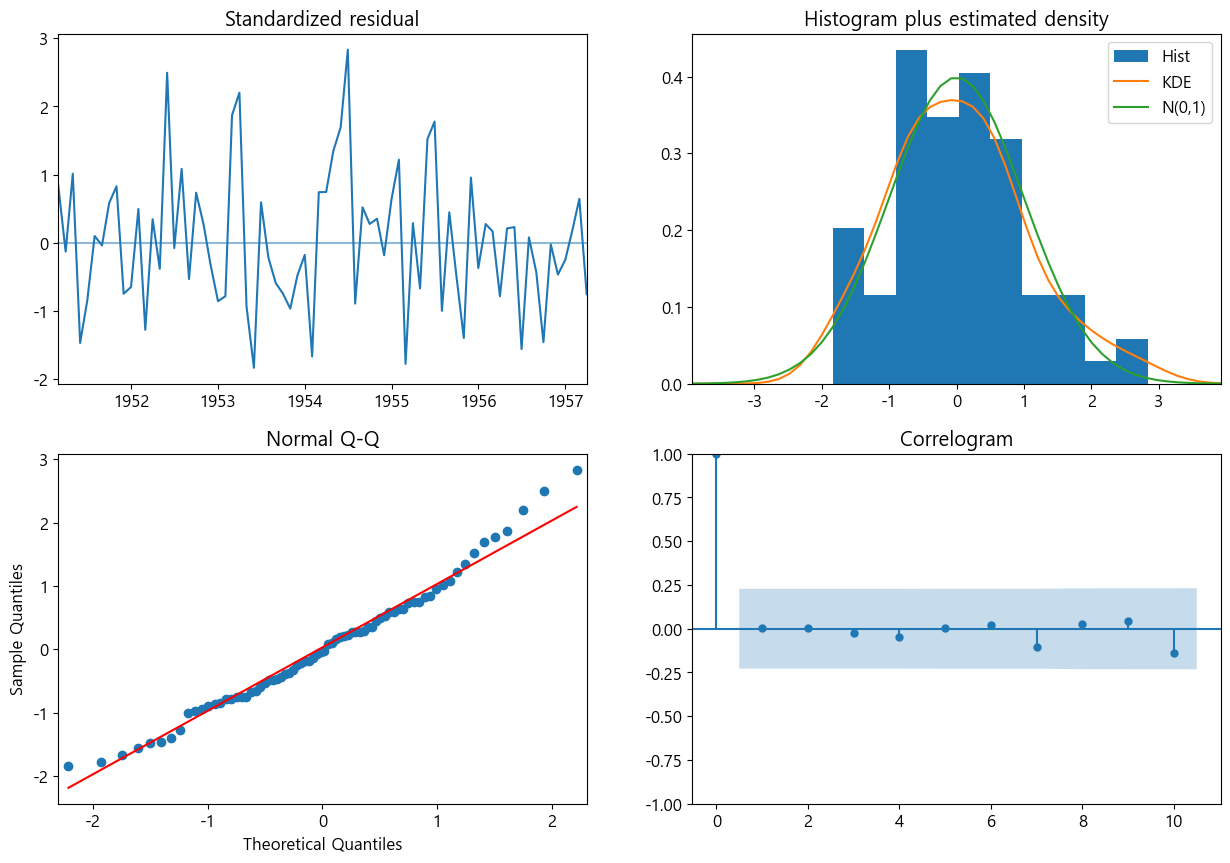

In [11]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

### 예상치 생성

학습결과를 토대로 주어진 n_peirod수 만큼의 이후데이터를 예상하여 결과를 반환


In [12]:
# 원본 데이터 이후 10단계 까지 예측
y_predict = model.predict(n_periods=int(len(test)+10))
y_predict

1957-05-01    353.001887
1957-06-01    404.404684
1957-07-01    458.201805
1957-08-01    438.689632
1957-09-01    388.085064
1957-10-01    331.313515
1957-11-01    287.557433
1957-12-01    327.148727
1958-01-01    337.122357
1958-02-01    318.144507
1958-03-01    370.266788
1958-04-01    360.138699
1958-05-01    368.959400
1958-06-01    435.883896
1958-07-01    496.438832
1958-08-01    468.139119
1958-09-01    412.561637
1958-10-01    347.657636
1958-11-01    302.561197
1958-12-01    346.764831
1959-01-01    358.430471
1959-02-01    341.134220
1959-03-01    392.107658
1959-04-01    382.591122
1959-05-01    388.221489
1959-06-01    462.217666
1959-07-01    526.212584
1959-08-01    494.128458
1959-09-01    431.669801
1959-10-01    356.456080
1959-11-01    303.324641
1959-12-01    352.010112
1960-01-01    360.138401
1960-02-01    338.451255
1960-03-01    396.043498
1960-04-01    380.204965
1960-05-01    387.902974
1960-06-01    467.494220
1960-07-01    532.155473
1960-08-01    497.102029


### 관측치와 예상치 비교

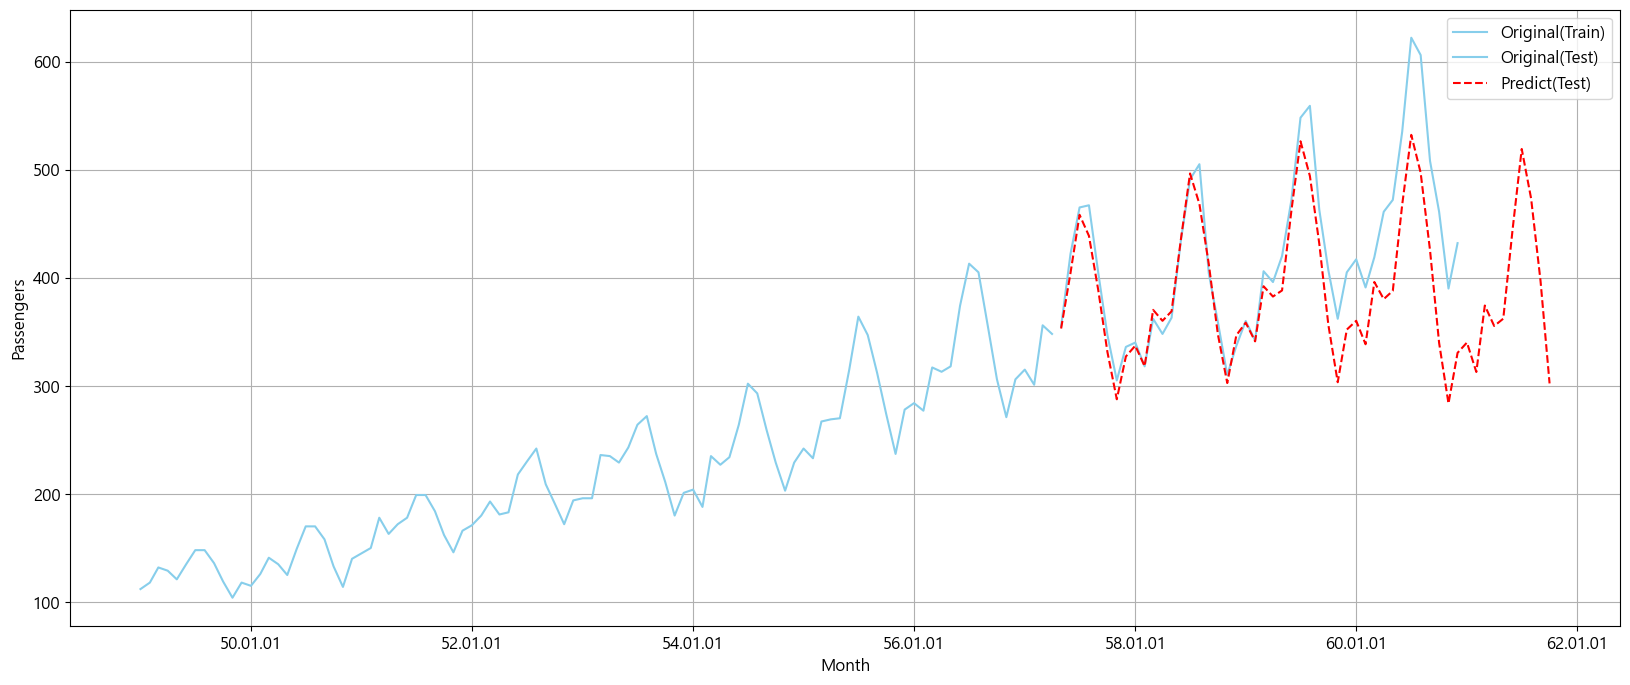

In [13]:
plt.figure(figsize=(20,8))

# 앞 70%의 원본 데이터
sb.lineplot(data=train, x=train.index, y='Passengers', label='Original(Train)', color='skyblue')

# 뒤 30%의 원본 데이터
sb.lineplot(data=test, x=test.index, y='Passengers', label='Original(Test)', color='skyblue')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=y_predict.index, y=y_predict.values, label='Predict(Test)', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Passengers')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()